In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import least_squares

# Non-Linear Least Squares Minimization with `scipy.optimize.least_squares`

So far we have only considered functional relationships that are linear in the unknown constants. Non-linear cases are far more complicated and generally require purely numerical solutions. For non-linear cases, we can use the [`least_squares`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares) function from the [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) submodule.

<!--
We will use a function from the SciPy module [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html), which contains functions for minimization, least squares and root finding techniques.
-->

## An Example of a Nonlinear Model

Consider the data found in the data file **nonlinear_data.csv** on [GitHub](https://raw.githubusercontent.com/maystey/uct_nassp_cm2021/master/book/content/numerical-methods/regression/data/nonlinear_data.csv) , plotted below:

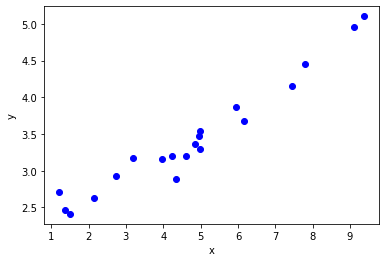

In [2]:
xdata, ydata = np.loadtxt('./data/nonlinear_data.csv', unpack = True, delimiter = ',')

plt.plot(xdata, ydata, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Though the data may appear to follow a linear trend, this is not the case. Consider the linear fit below:

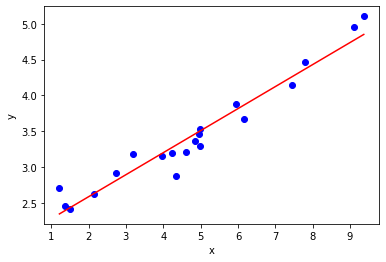

In [3]:
#Remove input

def lin_f(a,x):
    return a[0] + a[1]*x

def lin_err(a, x, y):
    return lin_f(a, x) - y

a0 = [1.5, 0.2]

fit = least_squares(lin_err, a0, args = (xdata, ydata))

#Plotting the fit and data
x = np.linspace(xdata.min(), xdata.max(), 1000)

plt.plot(xdata, ydata, 'bo')
plt.plot(x, lin_f(fit.x, x), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

and compare this to a fit using an exponential function as the relation:

$$
y = a_0 + a_1 e^{a_2 x}
$$

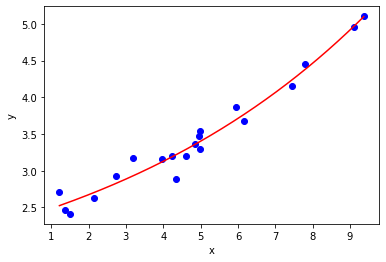

In [4]:
#Model
def f(a, x):
    return a[0] + a[1] * np.exp(a[2] * x)

#Residuals (in this case the error term)
def err(a, x, y):
    return f(a, x) - y

#Reading the data

#Performing the fit
a0 = [1.5, 0.6, 0.2] #initial guess

fit = least_squares(err, a0, args = (xdata, ydata))

#Plotting the fit and data
x = np.linspace(xdata.min(), xdata.max(), 1000)

plt.plot(xdata, ydata, 'bo')
plt.plot(x, f(fit.x, x), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Note that this functional relation is non-linear for $a_2$. Applying the method for least squares minimization to this functional relation will not yield an analytic solution, therefore a numerical method is required. We shall not be implementing this numerical method ourselves, instead using the aforementioned function from **SciPy** to solve our problem. In essence the numerical minimization technique involves following the negative gradient (or an approximation of this) from a given starting point until a local minimum is found (which is taken as the solution).

<!---
Include a visual analogy of a ball rolling down a surface
--->

## Nonlinear Least Squares Minimization with `scipy.optimize.least_squares`

Unlike for the linear case, finding the $a_j$ values which best fit the data will require starting with an initial guess for these values. If possible, it is advised to visualize the model produced by the initial fit and compare it to the data. As we will demonstrate, in certain cases it is possible that the algorithm will not converge on a desired solution if inappropriate initial values are used.

The call signature of `least_squares` (including only the arguments of immediate interest to us) is:

```python
least_squares(fun, x0, ..., bounds = (-np.inf, np.inf), ..., args = (), kwargs = ())
```

where

- `fun` is a callable object (function) referred to as the "residual". The squared sum of the return values from `fun` is the quantity that is minimized. In the case of least squares minimization, this is the error for each $y$ variable.

    The call signature of `fun` is `fun(x, *args, **kwargs)`, where
    - `x` is an array of the $a_j$ values
    - `args` is a tuple of additional arguments (the same `args` argument passed into the `least_squares` function will be used here)
    - `kwargs` is a dictionary of additional keyword arguments (the same `kwargs` argument passed into the `least_squares` function will be used here)

- `x0` is an array of the initial guess for our $a_j$ values.

- `args` a tuple of optional additional arguments to pass into `fun`. We will mostly use this to pass in the $y$ and $x_j$ data.

- `kwargs` a dictionary of optional additional keyword arguments to pass into `fun`.

- `bounds` is a tuple of array-like values. If limits should be imposed on allowed $a_j$ values, then you can set these here. The structure of the limits are $([a_{0~\text{min}}, a_{1~\text{min}}, \dots, a_{m~\text{min}}], [a_{0~\text{max}}, a_{1~\text{max}}, \dots, a_{m~\text{max}}])$. You can use `np.inf` if you want to leave a value unbounded.


The return value of the `least_squares` function is an object with the following fields of interest to us:

- `x`: an array of the solution found for the $a_j$ values.
- `success`: boolean, True if the solution has converged.

<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b></h5>

Let's use `least_squares` to fit the functional relation:

\begin{align*}
y &= a_0 + a_1 e^{a_2 x}\\
  &= f(x; \vec{a}) 
\end{align*}

to the **nonlinear_data.csv** data.

First we shall define the functional relation:

```Python
def f(a, x):
    return a[0] + a[1] * np.exp(a[2] * x)
```

and use this to define the residuals. For regular least-squares, we will use the error as the residuals:

$$
\epsilon = f(x; \vec{a}) - y
$$

in Python this looks like:

```Python
def err(a, x, y):
    return f(a, x) - y
```

Note that, if we wanted to make this a bit more generic, we could pass the function `f` into the `err` function as an argument.

Putting this into practice:

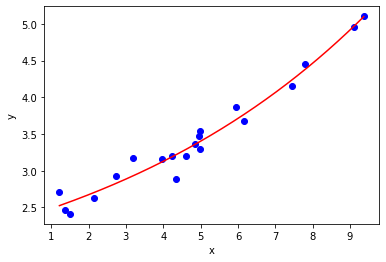

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#importing scipy.optimize.leastsq only
from scipy.optimize import least_squares

#The model to fit to the data
def f(a, x):
    return a[0] + a[1] * np.exp(a[2] * x)

#Residuals (in this case the error term)
def err(a, x, y):
    return f(a, x) - y

#Reading the data
# The `unpack` keyword argument seperates the columns into individual arrays 
xdata, ydata = np.loadtxt('data/nonlinear_data.csv', delimiter = ',', unpack = True) 

#Performing the fit
a0 = [1.5, 0.6, 0.2] #initial guess

fit = least_squares(err, a0, args = (xdata, ydata))

#Plotting the fit and data
x = np.linspace(xdata.min(), xdata.max(), 1000)

plt.plot(xdata, ydata, 'bo')
plt.plot(x, f(fit.x, x), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

</div>

### Solutions Converging on Local Minima

As mentioned before, the numerical algorithm is complete once it has minimized the objective function (the sum of errors squared in out case) to a **local minimum**. It is possible for the solution to not represent the global minimum, which is the ideal solution to obtain.

Let's take a relatively simple example to illustrate this. Consider the functional relation:

$$
y = a_0 + a_1 e^{-a_2 x} \sin(a_3 x)
$$

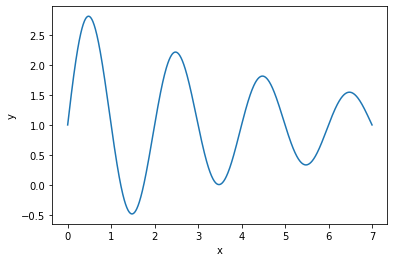

In [6]:
def f_sin(a, x):
    return a[0] + a[1] * np.exp(-a[2] * x) * np.sin(a[3] * x)

def err_sin(a, x, y):
    return y - f_sin(a, x)


x_arr = np.linspace(0, 7, 1000)
a = [1, 2, 0.2, np.pi]

fig, ax = plt.subplots()

ax.plot(x_arr, f_sin(a, x_arr))
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Given a set of data characterized by this relation:

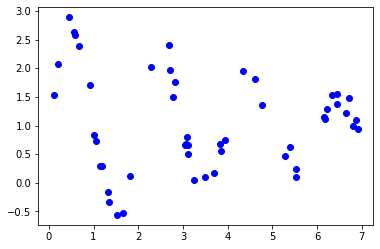

In [7]:
#data

xdata, ydata = np.loadtxt('./data/nonlinear_sine.csv', delimiter = ',', unpack = True)

#Writing
#np.savetxt('data/nonlinear_sine.csv', np.array((xdata, ydata)).T, header = 'x,y', delimiter = ',')

#Plotting
plt.plot(xdata, ydata, 'bo')
plt.show()

It is relatively easy to find a good fit using `leastsq`:

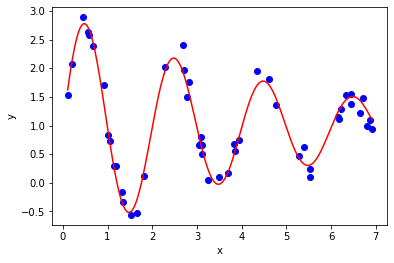

In [8]:
a0 = [1, 2.5, 0.2 , 2]

xdata, ydata = np.loadtxt('data/nonlinear_sine.csv', delimiter = ',', unpack = True)

fit = least_squares(err_sin, a0, args = (xdata, ydata))

x_arr = np.linspace(xdata.min(), xdata.max(), 1000)

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'bo')
ax.plot(x_arr, f_sin(fit.x, x_arr), 'r-')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Here are a couple of examples of solutions that returns a supposedly successful solution, but have obviously not converged to the best fit.

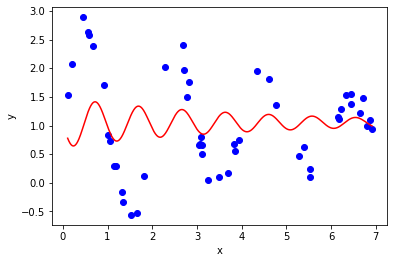

In [9]:
a0 = [1, 2.5, 0.2 , 6]

xdata, ydata = np.loadtxt('data/nonlinear_sine.csv', delimiter = ',', unpack = True)

fit = least_squares(err_sin, a0, args = (xdata, ydata))

x_arr = np.linspace(xdata.min(), xdata.max(), 1000)

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'bo')
ax.plot(x_arr, f_sin(fit.x, x_arr), 'r-')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

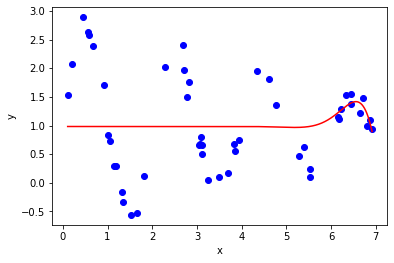

In [10]:
a0 = [1, 2.5, -1.3 , 2]

xdata, ydata = np.loadtxt('data/nonlinear_sine.csv', delimiter = ',', unpack = True)

fit = least_squares(err_sin, a0, args = (xdata, ydata))

x_arr = np.linspace(xdata.min(), xdata.max(), 1000)

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'bo')
ax.plot(x_arr, f_sin(fit.x, x_arr), 'r-')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Here is an example of a solution that has not succeeded:

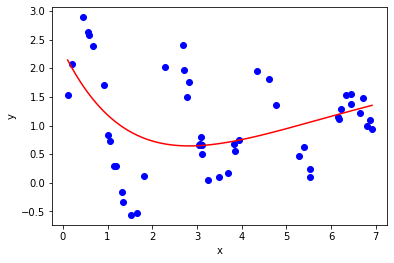

In [11]:
a0 = [1, 2.5, -2 , 1.17]

xdata, ydata = np.loadtxt('data/nonlinear_sine.csv', delimiter = ',', unpack = True)

fit = least_squares(err_sin, a0, args = (xdata, ydata))

x_arr = np.linspace(xdata.min(), xdata.max(), 1000)

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'bo')
ax.plot(x_arr, f_sin(fit.x, x_arr), 'r-')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

If your model does not fit, try varying the initial guess for the fit parameters.